# Computer vision mit pytorch


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image, ImageOps

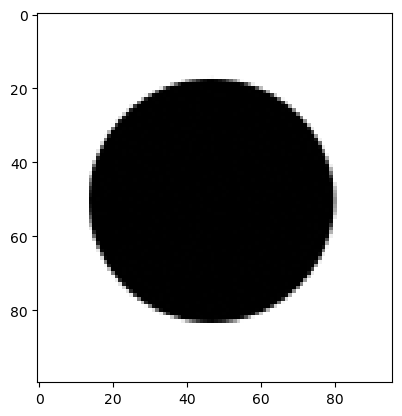

In [2]:
# Open image: "/../SchwarzerKreis.png")
img = Image.open("SchwarzerKreis.png")
img = ImageOps.grayscale(img)

plt.imshow(img, cmap='gray')
plt.show()

In [3]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, dilation=1, bias=False, padding_mode='replicate')

# Filterkernels

In [8]:
gx_weights = np.array([[-0.25, 0, 0.25], 
                       [-0.5, 0, 0.5], 
                       [-0.25, 0, 0.25]], dtype=np.float32)

gy_weights = np.array([[-0.25, -0.5, -0.25], 
                       [0, 0, 0],
                       [0.25, 0.5, 0.25]], dtype=np.float32)

binomial_weights = np.array([[0.125, 0.25, 0.125],
                             [0.25, 0.5, 0.25],
                             [0.125, 0.25, 0.125]], dtype=np.float32)

In [9]:
transform = transforms.ToTensor()

In [10]:
def WeightsToStateDict(weight, conv2d):
    weight = torch.from_numpy(weight)
    weight = weight.unsqueeze(0).unsqueeze(0)
    conv2d.load_state_dict({'weight': weight})

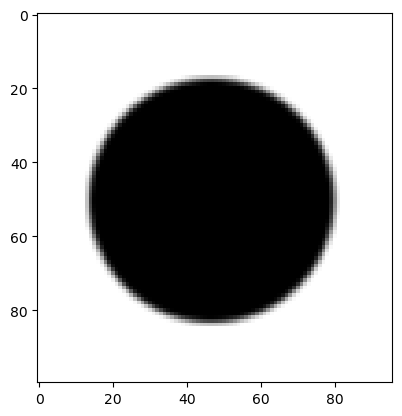

In [13]:
WeightsToStateDict(binomial_weights, conv2d)
img_blurred = conv2d(transform(img))

plt.imshow(img_blurred[0].detach().numpy(), cmap='gray')
plt.show()

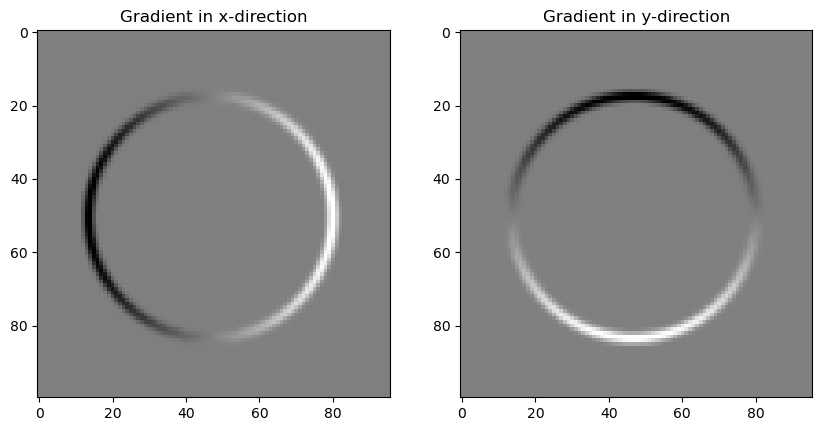

In [18]:
WeightsToStateDict(gx_weights, conv2d)
img_gx = conv2d(img_blurred)

WeightsToStateDict(gy_weights, conv2d)
img_gy = conv2d(img_blurred)

# Plot images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_gx[0].detach().numpy(), cmap='gray')
plt.title("Gradient in x-direction")
plt.subplot(1, 2, 2)
plt.imshow(img_gy[0].detach().numpy(), cmap='gray')
plt.title("Gradient in y-direction")
plt.show()

# Magnitude

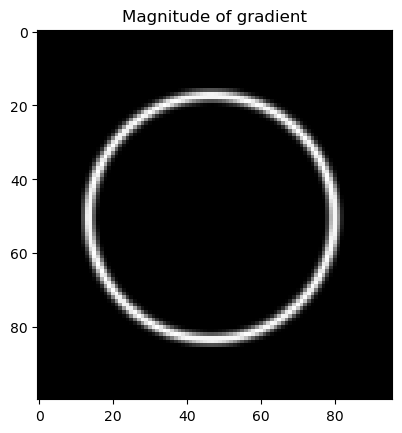

In [21]:
img_magnitude = torch.sqrt(img_gx**2 + img_gy**2)
img_magnitude = img_magnitude / img_magnitude.max()

plt.imshow(img_magnitude[0].detach().numpy(), cmap='gray')
plt.title("Magnitude of gradient")
plt.show()

# Normalenorientierung

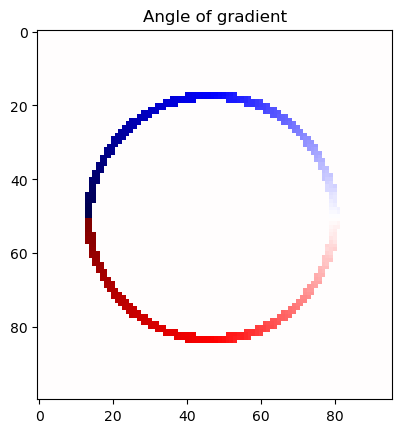

In [41]:
angle = torch.atan2(img_gy, img_gx)
angle = torch.where(img_magnitude > 0.5, angle, torch.tensor(0.0))

plt.imshow(angle[0].detach().numpy(), cmap='seismic')
plt.title("Angle of gradient")
plt.show()

# Histogram

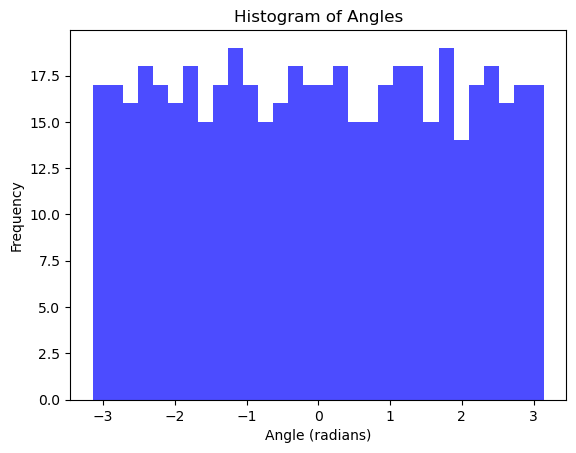

In [48]:
angles_np = angle[0].detach().numpy()
angles_flat = angles_np.flatten()

plt.hist(angles_flat[angles_flat != 0], bins=30, range=(-np.pi, np.pi), color='blue', alpha=0.7)
plt.title("Histogram of Angles")
plt.xlabel("Angle (radians)")
plt.ylabel("Frequency")
plt.show()

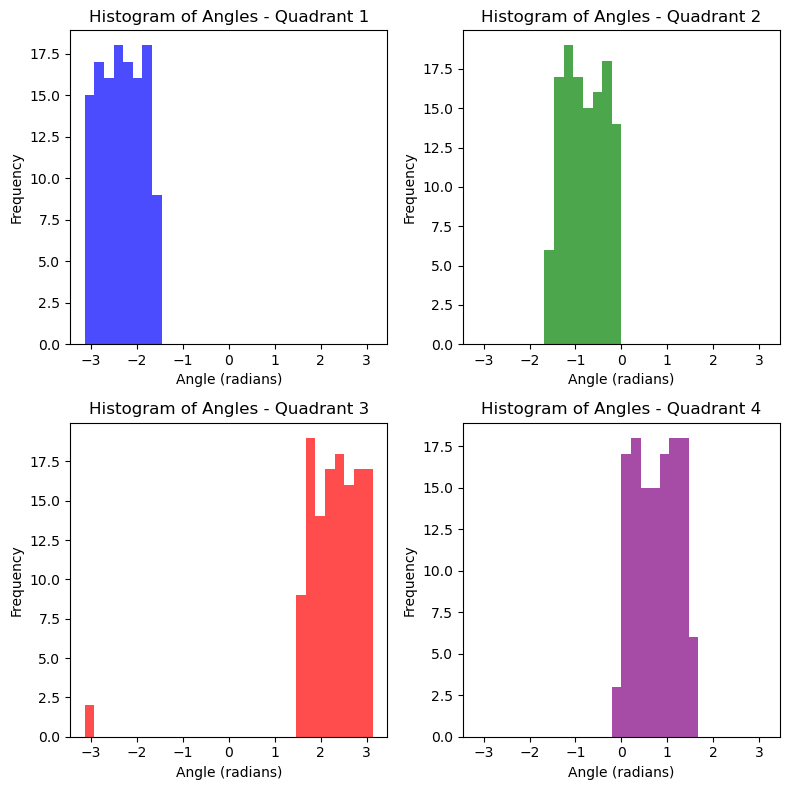

In [45]:
height, width = angles_np.shape

quadrant_1 = angles_np[:height//2, :width//2]
quadrant_2 = angles_np[:height//2, width//2:]
quadrant_3 = angles_np[height//2:, :width//2]
quadrant_4 = angles_np[height//2:, width//2:]

quadrant_1_flat = quadrant_1.flatten()
quadrant_2_flat = quadrant_2.flatten()
quadrant_3_flat = quadrant_3.flatten()
quadrant_4_flat = quadrant_4.flatten()

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.hist(quadrant_1_flat[quadrant_1_flat != 0], bins=30, range=(-np.pi, np.pi), color='blue', alpha=0.7)
plt.title("Histogram of Angles - Quadrant 1")
plt.xlabel("Angle (radians)")
plt.ylabel("Frequency")
plt.subplot(2, 2, 2)
plt.hist(quadrant_2_flat[quadrant_2_flat != 0], bins=30, range=(-np.pi, np.pi), color='green', alpha=0.7)
plt.title("Histogram of Angles - Quadrant 2")
plt.xlabel("Angle (radians)")
plt.ylabel("Frequency")
plt.subplot(2, 2, 3)
plt.hist(quadrant_3_flat[quadrant_3_flat != 0], bins=30, range=(-np.pi, np.pi), color='red', alpha=0.7)
plt.title("Histogram of Angles - Quadrant 3")
plt.xlabel("Angle (radians)")
plt.ylabel("Frequency")
plt.subplot(2, 2, 4)
plt.hist(quadrant_4_flat[quadrant_4_flat != 0], bins=30, range=(-np.pi, np.pi), color='purple', alpha=0.7)
plt.title("Histogram of Angles - Quadrant 4")
plt.xlabel("Angle (radians)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()